In [1]:
import pandas as pd

In [2]:
games_df = pd.read_csv('./data/aus_fb/games.csv')
players_df = pd.read_csv('./data/aus_fb/players.csv')
stats_df = pd.read_csv('./data/aus_fb/stats.csv')

In [3]:
# describe
games_df.describe()

,Year,MaxTemp,MinTemp,Rainfall,HomeTeamScoreQT,HomeTeamScoreHT,HomeTeamScore3QT,HomeTeamScoreFT,HomeTeamScore,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore
count,2663.000000,2656.000000,2656.000000,2640.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000
mean,2018.004506,19.159563,9.786069,2.115492,3.442508,6.753372,9.946354,12.995554,87.341720,3.122569,6.224296,9.263590,12.144461,81.100638
std,3.779912,5.034669,4.524560,6.319302,1.782171,2.692167,3.530947,4.338707,27.063891,1.720840,2.564564,3.379207,4.146537,26.087576
min,2012.000000,8.700000,-5.400000,0.000000,0.000000,0.120000,1.110000,2.100000,16.000000,0.000000,0.100000,1.100000,1.800000,14.000000
25%,2015.000000,15.100000,6.800000,0.000000,2.200000,4.750000,7.500000,10.100000,68.000000,2.100000,4.400000,6.700000,9.130000,63.000000
50%,2018.000000,18.450000,9.400000,0.000000,3.300000,6.600000,9.700000,12.700000,85.000000,3.100000,6.100000,8.900000,11.800000,79.000000
75%,2021.000000,22.700000,12.700000,1.450000,4.400000,8.500000,12.160000,16.100000,105.000000,4.250000,7.800000,11.550000,14.800000,97.000000
max,2024.000000,37.600000,25.000000,114.400000,10.400000,18.600000,25.140000,31.190000,205.000000,11.400000,16.700000,22.100000,29.130000,187.000000


In [4]:
games_df.columns

Index(['GameId', 'Year', 'Round', 'Date', 'MaxTemp', 'MinTemp', 'Rainfall',
       'Venue', 'StartTime', 'Attendance', 'HomeTeam', 'HomeTeamScoreQT',
       'HomeTeamScoreHT', 'HomeTeamScore3QT', 'HomeTeamScoreFT',
       'HomeTeamScore', 'AwayTeam', 'AwayTeamScoreQT', 'AwayTeamScoreHT',
       'AwayTeamScore3QT', 'AwayTeamScoreFT', 'AwayTeamScore'],
      dtype='object')

In [5]:
# how often did a home team win
games_df['HomeTeamWin'] = games_df['HomeTeamScore'] > games_df['AwayTeamScore']

# what percentage of games did the home team win as a float value
float(games_df['HomeTeamWin'].mean())

0.5628989861058956

In [6]:
games_df['WasRaining'] = games_df['Rainfall'] > 0.0

float(games_df['WasRaining'].mean())

0.44686443860307923

In [7]:
# convert temp to farenheit
games_df['MaxTempFar'] = games_df['MaxTemp'] * 9/5 + 32

games_df['MaxTempFar']

0       75.20
1       78.26
2       81.32
3       84.38
4       82.76
        ...  
2658    60.80
2659    76.64
2660    79.52
2661    63.86
2662    70.16
Name: MaxTempFar, Length: 2663, dtype: float64

<Axes: xlabel='Date'>

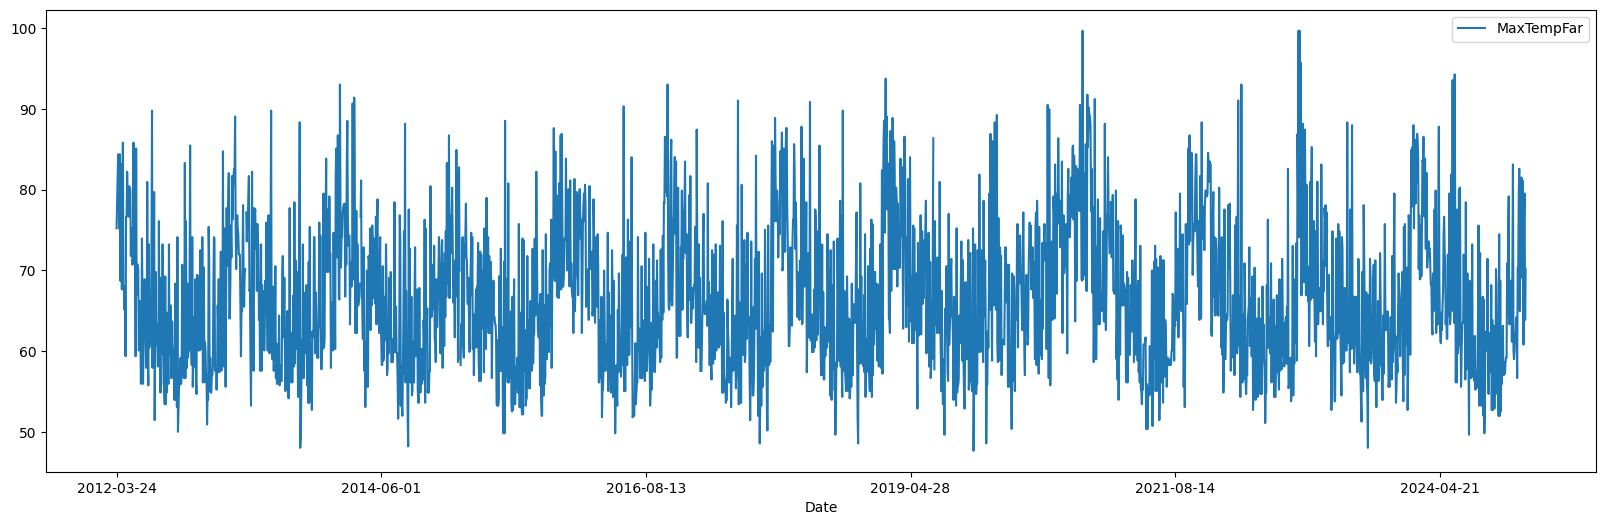

In [16]:
# plot max temp farenheit vs date
games_df.plot(x='Date', y='MaxTempFar', kind='line', figsize=(20, 6))

In [17]:
players_df.columns

Index(['PlayerId', 'DisplayName', 'Height', 'Weight', 'Dob', 'Position',
       'Origin'],
      dtype='object')

<Axes: xlabel='Height', ylabel='Weight'>

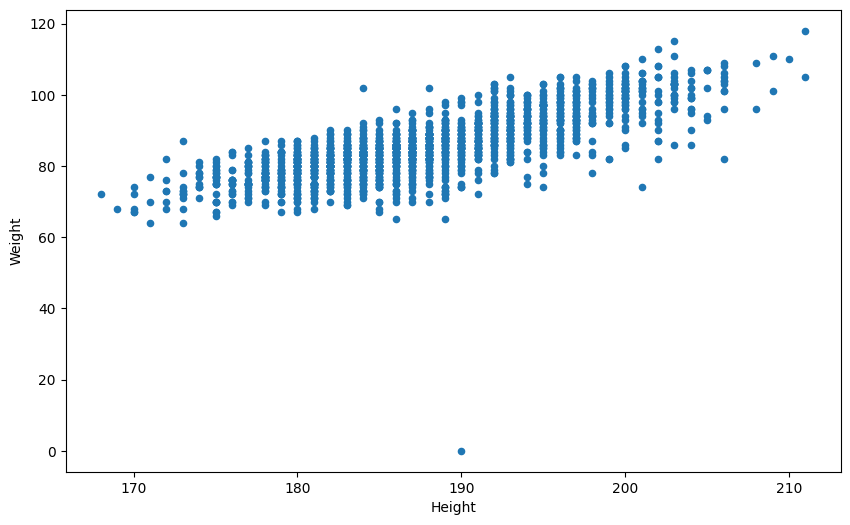

In [18]:
players_df.plot(x='Height', y='Weight', kind='scatter', figsize=(10, 6))

<Axes: xlabel='HeightFt', ylabel='WeightLb'>

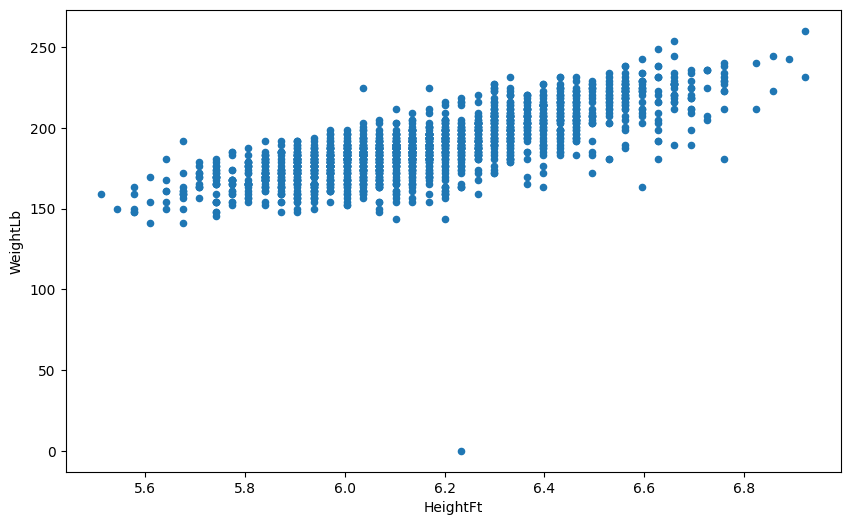

In [20]:
# hieht from centemeters to feet
players_df['HeightFt'] = players_df['Height'] / 30.48

# weight from kg to pounds
players_df['WeightLb'] = players_df['Weight'] * 2.20462

players_df.plot(x='HeightFt', y='WeightLb', kind='scatter', figsize=(10, 6))

<Axes: xlabel='Dob'>

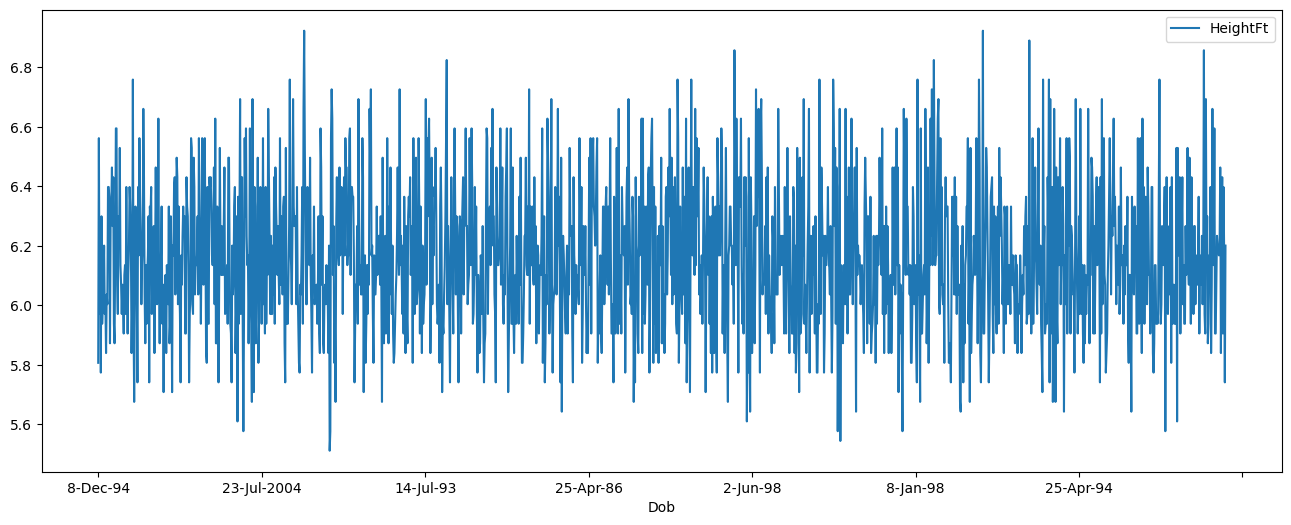

In [25]:
players_df.plot(x='Dob', y='HeightFt', kind='line', figsize=(16, 6))